#### **Find the following integral using the simpson's 1/3 rule**

Simpson's 1/3 rule uses higher-order polynomials to approximate the integral of a function $f(x)$ over the interval $[a,b]$. For Example, if there is an extra point midway between $f(a)$ and $f(b)$, the three points can be connected with a parabola. The area under the parabola is an approximation of the integral of $f(x)$ over the interval $[a,b]$.

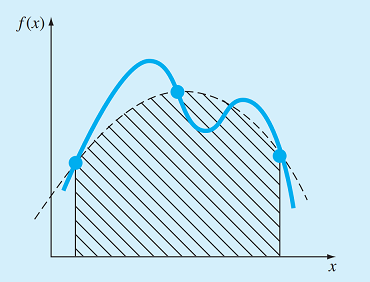

If we are given values of $f(x)$ at 3 points as $(x_0, f(x_0))$, $(x_1, f(x_1))$, and $(x_2, f(x_2))$ then we can estimate $f(x)$ using the Lagrange polynomial of degree 2: 

$$
\begin{align*}
f(x) &\approx f(x_0) \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} + f(x_1) \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)} + f(x_2) \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)} 
\end{align*}
$$

Now, as the area under the estimated curve is an approximation of the integral of $f(x)$ over the interval $[a,b]$, we can write the integral as:

$$
\begin{align*}
I &= \int_{a}^{b} f(x) dx \\
&\approx \int_{a}^{b} \left[f(x_0)\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} + f(x_1) \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)} + f(x_2) \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)} \right] dx 
\end{align*}
$$

When $a = x_0$, $b = x_2$, $x_1 = \frac{a+b}{2}$, and $h = \frac{b-a}{2}$, we can simplify the integral to:

$$
\begin{align*}
    I &\approx \frac{h}{3} \left[ f(x_0) + 4f(x_1) + f(x_2) \right] \\
    &= (b-a) \frac{f(x_0) + 4f(x_1) + f(x_2)}{6}
\end{align*}
$$

We will use Simpson's 1/3 rule to approximate the integral of $f(x) = 0.2 + 25x - P^3 x^2 + Q^3 x^3 - 100Rx^4 + 400x^5$, where, PQR are last 3 digits of your roll number, over the interval $[0, 0.8]$. Follow the steps below to approximate the integral using Simpson's 1/3 rule.

##### **Step 1: Define the function**

Define a function `f` that takes a single parameter `x` and returns the value of $f(x) = 0.2 + 25x - P^3 x^2 + Q^3 x^3 - 100Rx^4 + 400x^5$ at `x`. Note that the function should be able to handle both scalar and vector inputs.


In [15]:
# Write appropriate code
import numpy as np
import matplotlib.pyplot as plt
def f(x):
  #051
    P, Q, R = 0,5,1
    return 0.2 + 25*x - ((P**3)*(x**2)) + ((Q**3)*(x**3)) - 100*R*x**4 + 400*x**5
#testing  for the function to able to handle both scalar and vector inputs.
x_scalar = 0.5
y_scalar = f(x_scalar)
print(y_scalar) 

x_vector = np.array([0.5, 0.6, 0.7])
y_vector = f(x_vector)
print(y_vector)  

34.575
[ 34.575  60.344 103.793]


##### **Step 2: Define a function to approximate the function $f(x)$ using Lagrange polynomial**

Define a function `lagrange` that takes four parameters `x0`, `x1`, `x2` and `x` and returns the value of the Lagrange polynomial of degree 2 at `x`. The function should be able to handle both scalar and vector inputs. Use the function `f` defined in Step 1 to evaluate the function at the given points. 

In [16]:
# write appropriate code
def lagrange(x0, x1, x2, x):
    f0, f1, f2 = f(x0), f(x1), f(x2)
    L0 = (x - x1)*(x - x2) / ((x0 - x1)*(x0 - x2))
    L1 = (x - x0)*(x - x2) / ((x1 - x0)*(x1 - x2))
    L2 = (x - x0)*(x - x1) / ((x2 - x0)*(x2 - x1))
    return f0*L0 + f1*L1 + f2*L2

##### **Step 3: Define the interval**
Define the interval as a numpy array of two elements, where the first element is the lower bound and the second element is the upper bound. Name the array `interval`.

In [17]:
# Write appropriate code

interval = np.array([0, 0.8])

##### **Step 4: Plot the function and the approximated polynomial**

Plot the function $f(x)$ and the approximated polynomial using the function `lagrange` defined in Step 2. Use the interval defined in Step 3 as the x-axis. Also, plot the points $(x_0, f(x_0))$, $(x_1, f(x_1))$, and $(x_2, f(x_2))$ on the same plot. Fill the area under the approximated polynomial using numpy's `fill_between` function.

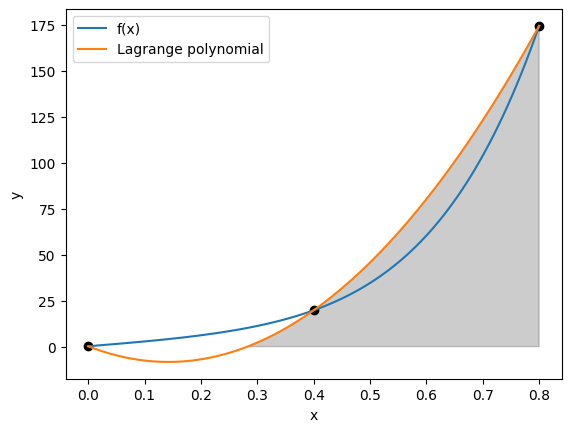

In [18]:
# Write appropriate code

# Calculate the step size
h = (interval[1] - interval[0]) / 2

# Define the x-values for plotting
x = np.linspace(interval[0], interval[1], 100)

# Define the points for the Lagrange polynomial
x0, x1, x2 = interval[0], interval[0]+h, interval[1]
y0, y1, y2 = f(x0), f(x1), f(x2)

# Evaluate the function and the Lagrange polynomial at x
y = f(x)
y_lagrange = lagrange(x0, x1, x2, x)

# Plot the function and the Lagrange polynomial
plt.plot(x, y, label='f(x)')
plt.plot(x, y_lagrange, label='Lagrange polynomial')

# Plot the points
plt.scatter(x0, y0, color='black')
plt.scatter(x1, y1, color='black')
plt.scatter(x2, y2, color='black')

# Fill the area under the Lagrange polynomial
plt.fill_between(x, y_lagrange, 0, where=y_lagrange>=0, color='black', alpha=0.2)

# Add labels and a legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()

##### **Step 5: Define a function to approximate the integral using Simpson's 1/3 rule**

Define a function `simpson` that takes a parameter `interval` and returns the approximate value of the integral of $f(x)$ over the interval `interval` using Simpson's 1/3 rule. You have to employ the following steps:

*   Calculate the midpoint of the interval. Store the value in a variable named `midpoint`.
*   Calculate the value of $f(x_0)$, $f(x_1)$, and $f(x_2)$, where $x_0 = a$, $x_1 = \frac{a+b}{2} = midpoint$, and $x_2 = b$. Store the values in variables named `f0`, `f1`, and `f2` respectively.
*   Calculate the approximate value of the integral using Simpson's 1/3 rule. Store the value in a variable named `I`.
*   Return the value of `I`.

In [19]:
# Write appropriate code
def simpson(interval):
    a, b = interval
    midpoint = (a + b) / 2
    f0 = f(a)
    f1 = f(midpoint)
    f2 = f(b)
    I = (b - a) * (f0 + 4*f1 + f2) / 6
    return I

##### **Step 6: Approximate the integral using Simpson's 1/3 rule**

Call the function `simpson` with the interval `interval` as the parameter. Store the value returned by the function in a variable named `I`. Print the value of `I`. Then you should compute the integral analytically and find the absolute relative error between the two values. Print the absolute relative error.

In [20]:
# Write appropriate code
# Step 6: Approximate the integral using Simpson's 1/3 rule

# Call the simpson function with interval as the parameter
I = simpson(interval)

# Print the value of I
print("Approximated value of the integral using Simpson's 1/3 rule:", I)

# Analytical calculation of the integral
a, b = interval[0], interval[1]
true_I = ((b**3)/3 - 2*(b**2)/2 + 5*b) - ((a**3)/3 - 2*(a**2)/2 + 5*a)

# Print the true value of the integral
print("True value of the integral:", true_I)

# Calculate the absolute relative error
abs_rel_error = abs((I - true_I) / true_I) * 100

# Print the absolute relative error
print("Absolute relative error:", abs_rel_error, "%")


Approximated value of the integral using Simpson's 1/3 rule: 33.79413333333334
True value of the integral: 3.530666666666667
Absolute relative error: 857.1601208459216 %
